In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("data/2022-09-26-results.csv")
data.head(2)
x = data["eps"].apply(lambda s: float(s)/100)
y_model = data["kappa_eff [S/m]"]
y_bruggeman = 0.1 * x ** 1.5
packed = pd.read_csv("data/packed_spheres.csv")
x_packed = packed["porosity"]
y_packed = packed["kappa_eff [S/m]"]

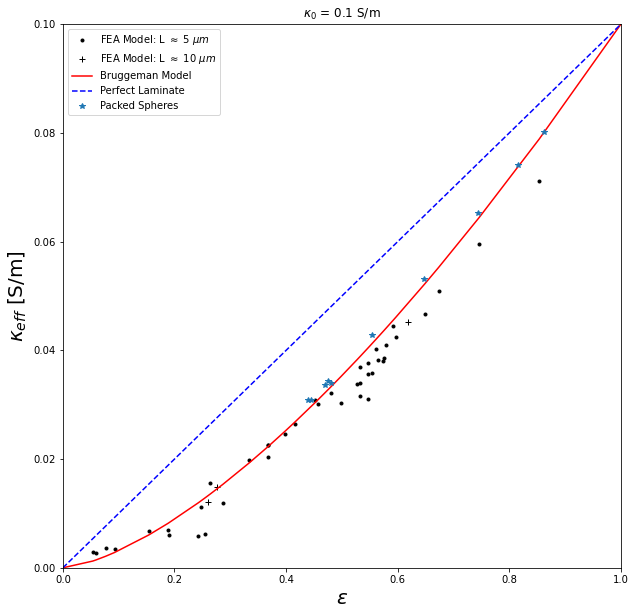

In [3]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(x, y_model, '.k', label='FEA Model: L $\mathrm{\\approx}$ 5 $\mu m$')
ax.plot([0.2608, 0.2768, 0.6189], [1.2130e-2, 1.4942e-2, 4.5267e-02], '+k', label='FEA Model: L $\mathrm{\\approx}$ 10 $\mu m$')
ax.plot([0] + list(x) + [1], [0] + list(y_bruggeman) + [0.1], 'r', label='Bruggeman Model')
ax.plot([0, 1], [0, 0.1], '--b', label='Perfect Laminate')
ax.plot(x_packed, y_packed, '*', label='Packed Spheres')
ax.set_xlabel(r"$\varepsilon$", fontsize=20)
ax.set_ylabel(r"$\kappa_{eff}$ [S/m]", fontsize=20)
ax.set_title(r"$\kappa_0$ = 0.1 S/m")
ax.set_xlim([0, 1])
ax.set_ylim([0, 0.1])
ax.legend()
plt.savefig("figures/effective-conductivity.png", dpi=500)
plt.show()